## Putting it all together

We've covered quite a bit in the last set of videos. Before moving onto the homework assignment, we'd like to go through a dataset end-to-end, from EDA to fitting a LR model. In this video we'll:
1. Load a dataset
2. Inspect missing data
3. Remove any outliers
4. Split into train/test
5. Impute any missing values
6. Standardise the data
7. Train a LR model

## download auto data

In [103]:
import pandas as pd
import wget
import csv

#wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original")

In [104]:
lines = []
with open('auto-mpg.data-original') as fh:
    for line in fh:
        separated = line.split("\t")
        abc = separated[0].split()
        separated[1].strip().strip("\"")
        abc.append(separated[1].strip().strip("\""))
        lines.append(abc)
print(len(lines))

column_names = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration', 'model year', 'origin', 'car name']
with open('auto-mpg.csv', 'w') as fh:
    _w = csv.writer(fh)
    _w.writerow(column_names)
    _w.writerows(lines)

406


## load data

In [105]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [106]:
df.shape

(406, 9)

## Visualise / Explore data

In [107]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


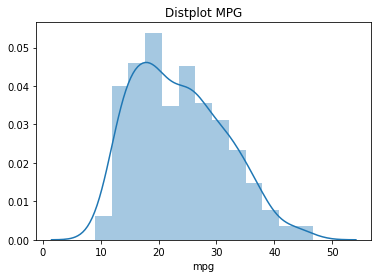

In [108]:
import seaborn as sns

_ = sns.distplot(df['mpg'].dropna()).set_title("Distplot MPG")

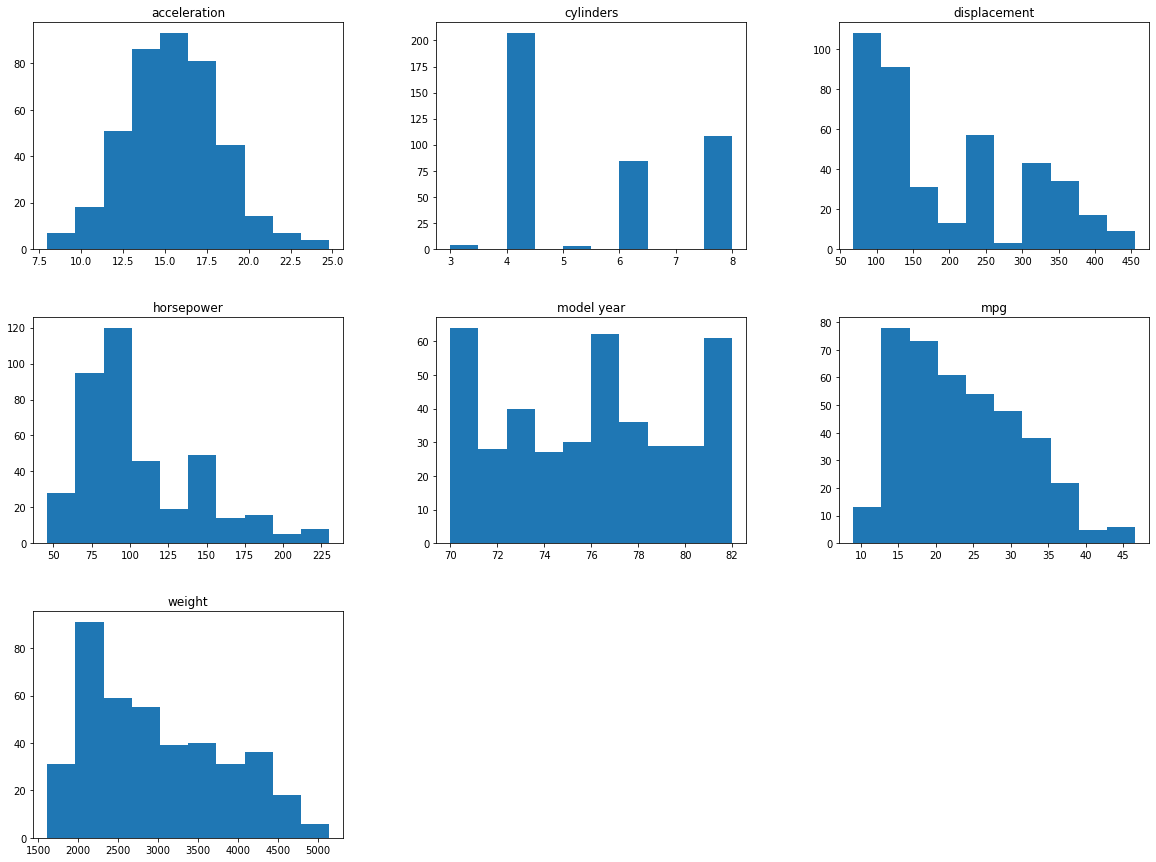

In [109]:
import warnings
import matplotlib.pyplot as plt

quant_fields = ['displacement', 'horsepower', 'weight', 'cylinders', 'acceleration', 'model year', 'mpg',]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    _ = df[quant_fields].hist(figsize=(20,15), grid=False)

### correlation plot

In [110]:
corr = df[quant_fields].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,displacement,horsepower,weight,cylinders,acceleration,model year,mpg
displacement,1,0.9,0.93,0.95,-0.56,-0.38,-0.8
horsepower,0.9,1,0.87,0.84,-0.7,-0.42,-0.78
weight,0.93,0.87,1,0.9,-0.43,-0.32,-0.83
cylinders,0.95,0.84,0.9,1,-0.52,-0.36,-0.78
acceleration,-0.56,-0.7,-0.43,-0.52,1,0.3,0.42
model year,-0.38,-0.42,-0.32,-0.36,0.3,1,0.58
mpg,-0.8,-0.78,-0.83,-0.78,0.42,0.58,1


## pairplot

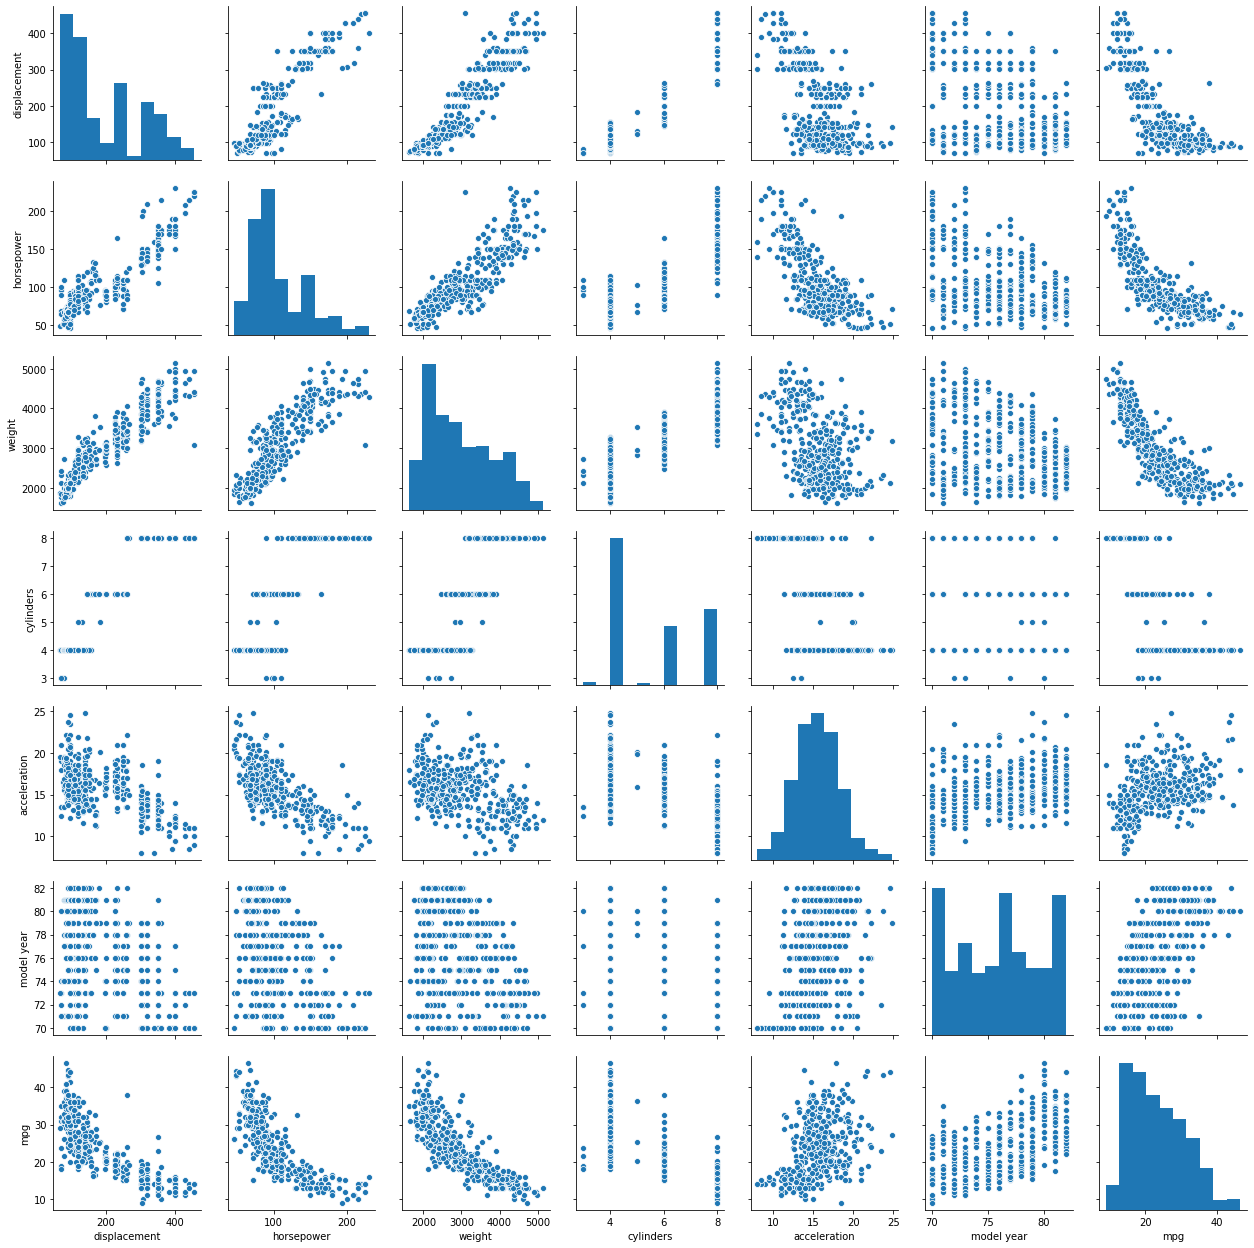

In [111]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(df[quant_fields])

### Categorical features

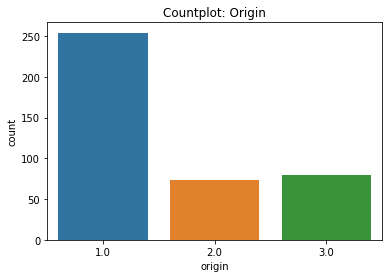

In [112]:
_ = sns.countplot(df['origin']).set_title("Countplot: Origin") 

In [113]:
df['car name'].nunique()

312

In [114]:
df['car name'].head(10)

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
5             ford galaxie 500
6             chevrolet impala
7            plymouth fury iii
8             pontiac catalina
9           amc ambassador dpl
Name: car name, dtype: object

In [115]:
df.shape

(406, 9)

## Drop missing mpg records before train/test split

In [116]:
df[df.mpg.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [117]:
df.drop(df[df.mpg.isna()].index, inplace=True)

## Train / Test split

In [118]:
from sklearn.model_selection import train_test_split
cols_to_ignore = ['mpg', 'car name']
training_columns = [col for col in df.columns if col not in cols_to_ignore]
training_columns

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [119]:
X = df[training_columns]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

In [120]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
29,4.0,121.0,113.0,2234.0,12.5,70.0,2.0
30,6.0,199.0,90.0,2648.0,15.0,70.0,1.0
354,4.0,85.0,65.0,1975.0,19.4,81.0,3.0
388,4.0,120.0,88.0,2160.0,14.5,82.0,3.0
76,8.0,350.0,160.0,4456.0,13.5,72.0,1.0


In [121]:
X_train.shape

(298, 7)

In [122]:
X_test.shape

(100, 7)

## Impute missing values

In [123]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,298.000000,298.00000,294.000000,298.000000,298.000000,298.000000,298.000000
mean,5.469799,194.10906,104.554422,2978.422819,15.592617,76.097315,1.577181
std,1.697917,105.56900,38.336868,868.192873,2.763253,3.657094,0.805546
min,3.000000,70.00000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,4.000000,100.25000,76.000000,2226.500000,13.625000,73.000000,1.000000
50%,4.000000,148.50000,94.500000,2747.500000,15.500000,76.000000,1.000000
75%,8.000000,292.00000,130.000000,3660.750000,17.175000,79.000000,2.000000
max,8.000000,455.00000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [124]:
from sklearn.impute import KNNImputer
import numpy as np

imp = KNNImputer(np.nan, n_neighbors=2)
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

## Standardise values

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Train LR Model

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#model = LinearRegression().fit(X_train_scaled, y_train)
#y_pred = model.predict(X_train_scaled)
model = LinearRegression().fit(X_train_imputed, y_train)
y_pred = model.predict(X_train_imputed)

print(f'Training MAE: {mean_absolute_error(y_train, y_pred):.2f}')
print(f'Training R2: {r2_score(y_train, y_pred):.2f}')
print()
y_test_pred = model.predict(X_test_imputed)
print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
print(f'Test R2: {r2_score(y_test, y_test_pred):.2f}')

Training MAE: 2.51
Training R2: 0.83

Test MAE: 2.61
Test R2: 0.79


## PCA - to plot

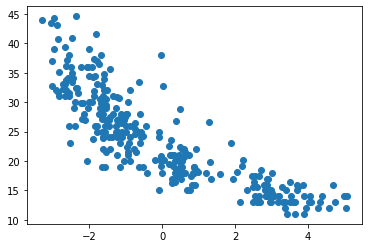

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_pca = pca.fit_transform(X_train_scaled)

plt.scatter(x_pca, y_train)
plt.show()